In [55]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import scipy.linalg as sla
import math
import random
import cv2

class Set():
    def __init__(self,x ,y, x_prime, y_prime) -> None:
        self.x = x
        self.y = y
        self.x_prime = x_prime
        self.y_prime = y_prime

    def get_coordinates(self):
        return np.array([self.x, self.y])
    
    def get_coordinates_prime(self):
        return np.array([self.x_prime, self.y_prime])
    
class SetList():
    def __init__(self) -> None:
        self.list = []
        pass

    def append(self, set:Set):
        self.list.append(set)

    def get(self, index) -> Set:
        return self.list[index]
    
    def size(self):
        return len(self.list)
    
    def get_random_4(self):
        values = []
        set_list = SetList()

        while True:
            if len(values) >= 4:
                break
            rand_int = random.randint(0 , len(self.list)-1)
            if rand_int not in values:
                values.append(rand_int)
                set_list.append(self.list[rand_int])

        return set_list
        
    def get_random_8(self):
        values = []
        set_list = SetList()

        while True:
            if len(values) >= 8:
                break
            rand_int = random.randint(0 , len(self.list)-1)
            if rand_int not in values:
                values.append(rand_int)
                set_list.append(self.list[rand_int])

        return set_list
    
def read_Sets(file_name_path):
    sets = SetList()

    #Reading the text file
    try:
        with open(file_name_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                values = line.split()
                set = Set((float)(values[0]), (float)(values[1]), (float)(values[2]), (float)(values[3]))
                sets.append(set)
            
    except FileNotFoundError:
        print(f"File '{file_name_path}' not found.")
    except Exception as e:
        print(f"{e}")

    return sets

def show_image2(image:Image.Image, file_name):
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(file_name)
    plt.show()

def show_image(image:Image.Image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def bilinear_interpolation(image:Image.Image, s):
    width, height = image.size

    background_color = (255, 255, 255)
    resize_image = Image.new("RGB", ((int)(width*s), (int)(height*s)), background_color)

    w, h = image.size
    width, height = resize_image.size

    for i in range(height):
        for j in range(width):
            x = j/s
            x_seperate = math.modf(x)
            y = i/s
            y_seperate = math.modf(y)
            if x_seperate[1]+1 >= w and y_seperate[1]+1 >= h:
                pix_final = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))
            elif x_seperate[1]+1 >= w:
                pix_1 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                pix_3 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1]+1)))

                pix_final = np.array(pix_1)*(1-y_seperate[0]) + np.array(pix_3)*(y_seperate[0])
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))
                pass
            elif y_seperate[1]+1 >= h:
                pix_1 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                pix_2 = image.getpixel(((int)(x_seperate[1]+1),(int)(y_seperate[1])))

                pix_final = np.array(pix_1)*(1-x_seperate[0]) + np.array(pix_2)*(x_seperate[0])
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))
                pass
            else:
                pix_1 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                pix_2 = image.getpixel(((int)(x_seperate[1]+1),(int)(y_seperate[1])))
                pix_3 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1]+1)))
                pix_4 = image.getpixel(((int)(x_seperate[1]+1),(int)(y_seperate[1]+1)))


                pix_mid_1 = np.array(pix_1)*(1-x_seperate[0]) + np.array(pix_2)*(x_seperate[0])
                pix_mid_2 = np.array(pix_3)*(1-x_seperate[0]) + np.array(pix_4)*(x_seperate[0])

                pix_final = np.array(pix_mid_1)*(1 - y_seperate[0]) + np.array(pix_mid_2)*(y_seperate[0])
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))

    return resize_image

def bilinear_interpolation_specific(image:Image.Image, width_set, height_set):
    width, height = image.size

    background_color = (255, 255, 255)
    resize_image = Image.new("RGB", ((int)(width_set), (int)(height_set)), background_color)

    w, h = image.size
    width, height = resize_image.size

    s_1 = width/w
    s_2 = height/h

    for i in range(height):
        for j in range(width):
            x = j/s_1
            x_seperate = math.modf(x)
            y = i/s_2
            y_seperate = math.modf(y)
            if x_seperate[1]+1 >= w and y_seperate[1]+1 >= h:
                pix_final = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))
            elif x_seperate[1]+1 >= w:
                pix_1 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                pix_3 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1]+1)))

                pix_final = np.array(pix_1)*(1-y_seperate[0]) + np.array(pix_3)*(y_seperate[0])
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))
                pass
            elif y_seperate[1]+1 >= h:
                pix_1 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                pix_2 = image.getpixel(((int)(x_seperate[1]+1),(int)(y_seperate[1])))

                pix_final = np.array(pix_1)*(1-x_seperate[0]) + np.array(pix_2)*(x_seperate[0])
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))
                pass
            else:
                pix_1 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1])))
                pix_2 = image.getpixel(((int)(x_seperate[1]+1),(int)(y_seperate[1])))
                pix_3 = image.getpixel(((int)(x_seperate[1]),(int)(y_seperate[1]+1)))
                pix_4 = image.getpixel(((int)(x_seperate[1]+1),(int)(y_seperate[1]+1)))


                pix_mid_1 = np.array(pix_1)*(1-x_seperate[0]) + np.array(pix_2)*(x_seperate[0])
                pix_mid_2 = np.array(pix_3)*(1-x_seperate[0]) + np.array(pix_4)*(x_seperate[0])

                pix_final = np.array(pix_mid_1)*(1 - y_seperate[0]) + np.array(pix_mid_2)*(y_seperate[0])
                resize_image.putpixel((j,i), ((int)(pix_final[0]), (int)(pix_final[1]), (int)(pix_final[2])))

    return resize_image
  

def greyscale(image) -> Image.Image:
    image_copy = image.convert('RGB')

    width, height = image.size

    for i in range(height):
        for j in range(width):
            r, g, b = image.getpixel((j,i))
            val = 0.2989*r + 0.5870*g + 0.1140*b
            color = ((int)(val), (int)(val), (int)(val))
            image_copy.putpixel((j,i), color)

    return image_copy  

def get_random_numbers(begin, end, amount):
    return random.sample(range(begin,end+1), amount)


In [56]:
def scale(x):
  return (x / np.max(x)) * 255

def log_scale(x):
  log_abs = np.log(np.abs(x) + 1)
  return scale(log_abs)

[[ 0  0  0 ...  0  0  0]
 [13 13 13 ... 13 13 13]
 [14 14 14 ... 14 14 14]
 ...
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]]


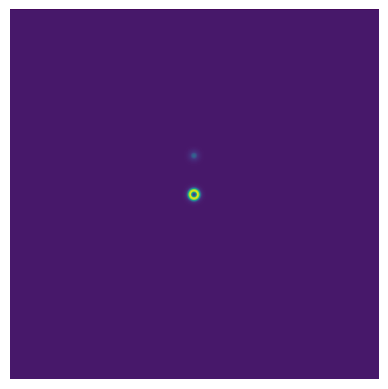

In [71]:
rows, cols = 896, 896
c_row, c_col = rows // 2, cols // 2

M = np.ones((9, 9)) / 9 **2
rlo = (rows // 2) - (M.shape[0] // 2)
rhi = (rows // 2) + M.shape[0] - (M.shape[0] // 2)
clo = (cols // 2) - (M.shape[1] // 2)
chi = (cols // 2) + M.shape[1] - (M.shape[1] // 2)

M0 = np.zeros((rows, cols))
M0[rlo:rhi, clo:chi] = M

M0 = cv2.imread("./sky_model.png", 0)
print(M0)
show_image(M0)

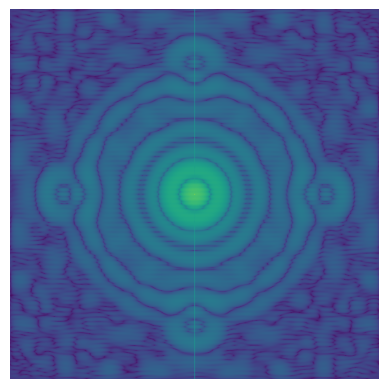

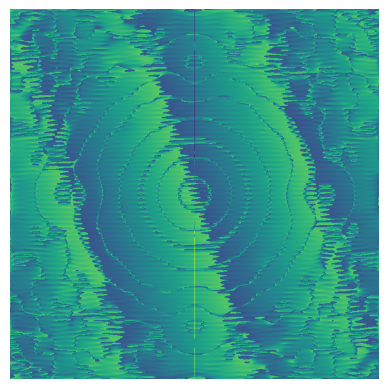

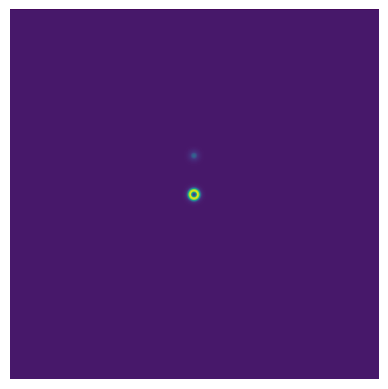

In [72]:
psf = np.fft.fft2(M0)
psf_shifted = np.fft.fftshift(psf)
show_image(log_scale(psf_shifted))
show_image(np.angle(psf_shifted))

ifft = np.fft.ifft2(psf).real
show_image(ifft)

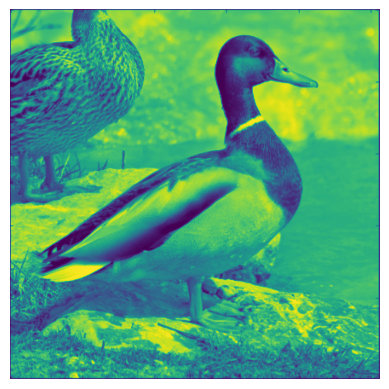

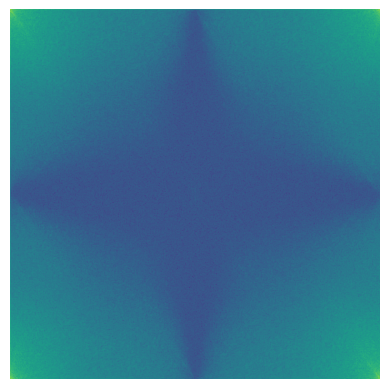

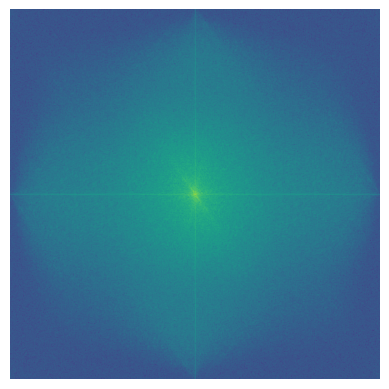

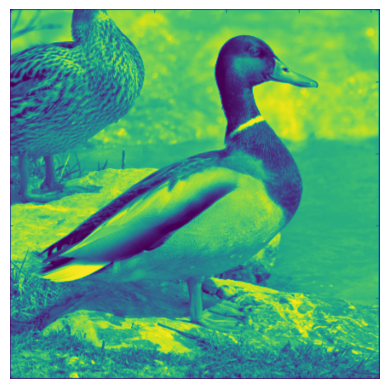

In [70]:
image_duck = cv2.imread("./duck.png", 0)
show_image(image_duck)

duck_dft = np.fft.fft2(image_duck)
show_image(log_scale(duck_dft))

duck_dft_shifted = np.fft.fftshift(duck_dft)
show_image(log_scale(duck_dft_shifted))

duck_ifft = np.fft.ifft2(duck_dft).real
show_image(duck_ifft)


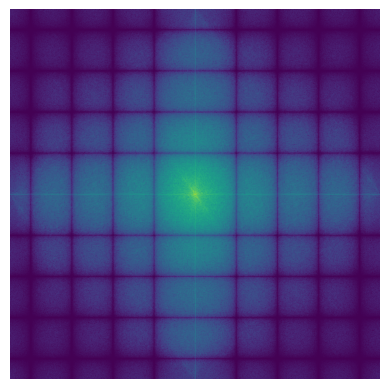

In [62]:
mask = psf * duck_dft
mask_shifted = np.fft.fftshift(mask)
show_image(log_scale(mask_shifted))

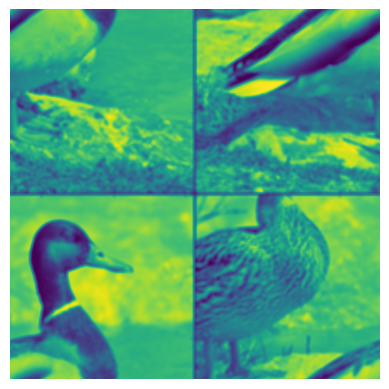

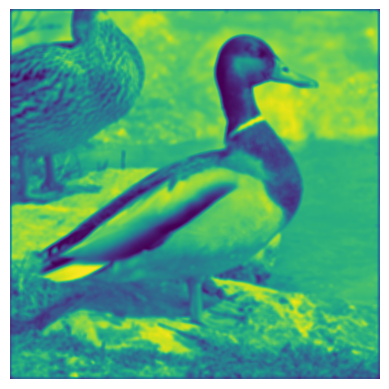

In [63]:
mask_ifft = np.fft.ifft2(mask).real
show_image(mask_ifft)

mask_ifft_shifted = np.fft.fftshift(mask_ifft)
show_image(mask_ifft_shifted)

Text(0.5, 1.0, 'Observed Image')

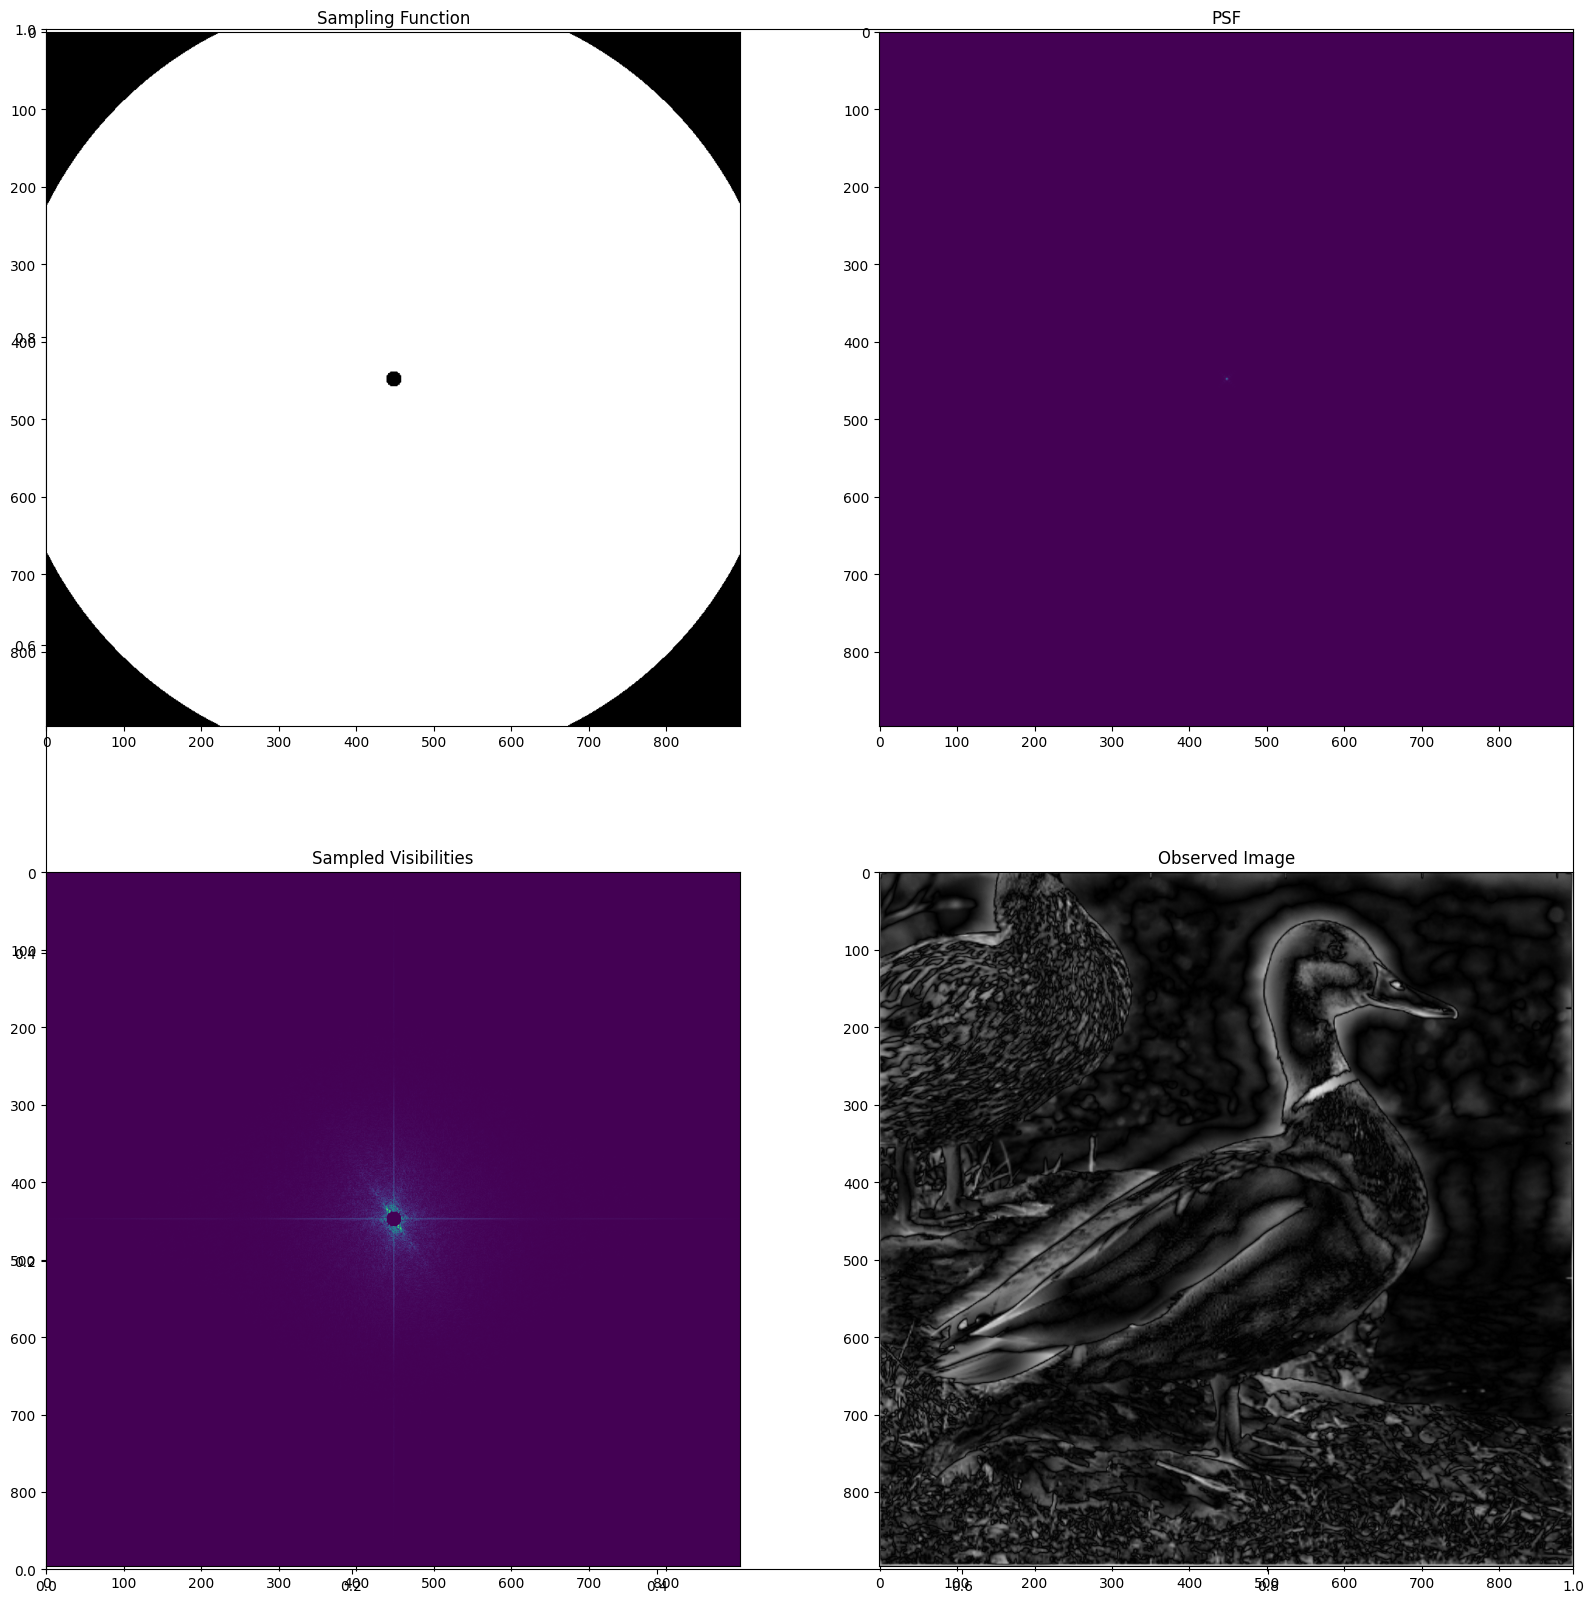

In [116]:
def circularSamplingMap(imgSize, outer, inner=0):
    """Return a circular sampling map of size [imgSize, imgSize]
    imgSize: image size in pixels
    outer: outer radius (in pixels) to exclude sampling above
    inner: inner radius (in pixels) to exclude sampling below"""
    zeros = np.zeros((imgSize,imgSize), dtype='float')
    ones = np.ones((imgSize,imgSize), dtype='float')
    xpos, ypos = np.mgrid[0:imgSize,0:imgSize]
    radius = np.sqrt((xpos - imgSize/2)**2. + (ypos - imgSize/2)**2.)
    sampling = np.where((outer >= radius) & (radius >= inner), ones, zeros)
    return sampling

sampling1 = circularSamplingMap(896, 100, 0)
fftDuck = np.fft.fftshift(np.fft.fft2(image_duck))

fig, axes = plt.subplots(figsize=(16,16))
fig.tight_layout()

plt.subplot(2,2,1)
sampling = circularSamplingMap(896, 500, 10)
samplingPlot = plt.imshow(sampling)
samplingPlot.set_cmap('gray')
plt.title('Sampling Function')

plt.subplot(2,2,2)
psfPlot = plt.imshow(np.abs( np.fft.fftshift( np.fft.fft2(sampling))))
plt.title('PSF')

plt.subplot(2,2,3)
samplingPlot = plt.imshow(np.abs(sampling * fftDuck))
plt.title('Sampled Visibilities')

plt.subplot(2,2,4)
obsDuck = np.abs(np.fft.ifft2(np.fft.fftshift(sampling * fftDuck)))
obsPlot = plt.imshow(obsDuck)
obsPlot.set_cmap('gray')
plt.title('Observed Image')





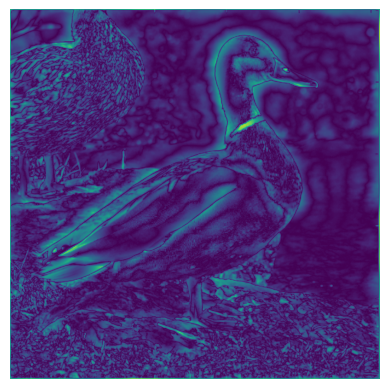

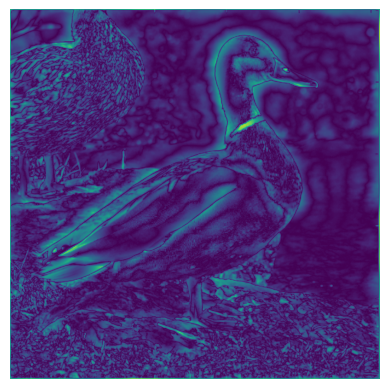

In [115]:
show_image(np.abs(np.fft.ifft2(np.fft.fftshift(sampling * fftDuck))))

show_image(np.abs(np.fft.ifft2(np.fft.fftshift(sampling * fftDuck))))

Text(0.5, 1.0, 'Observed Image')

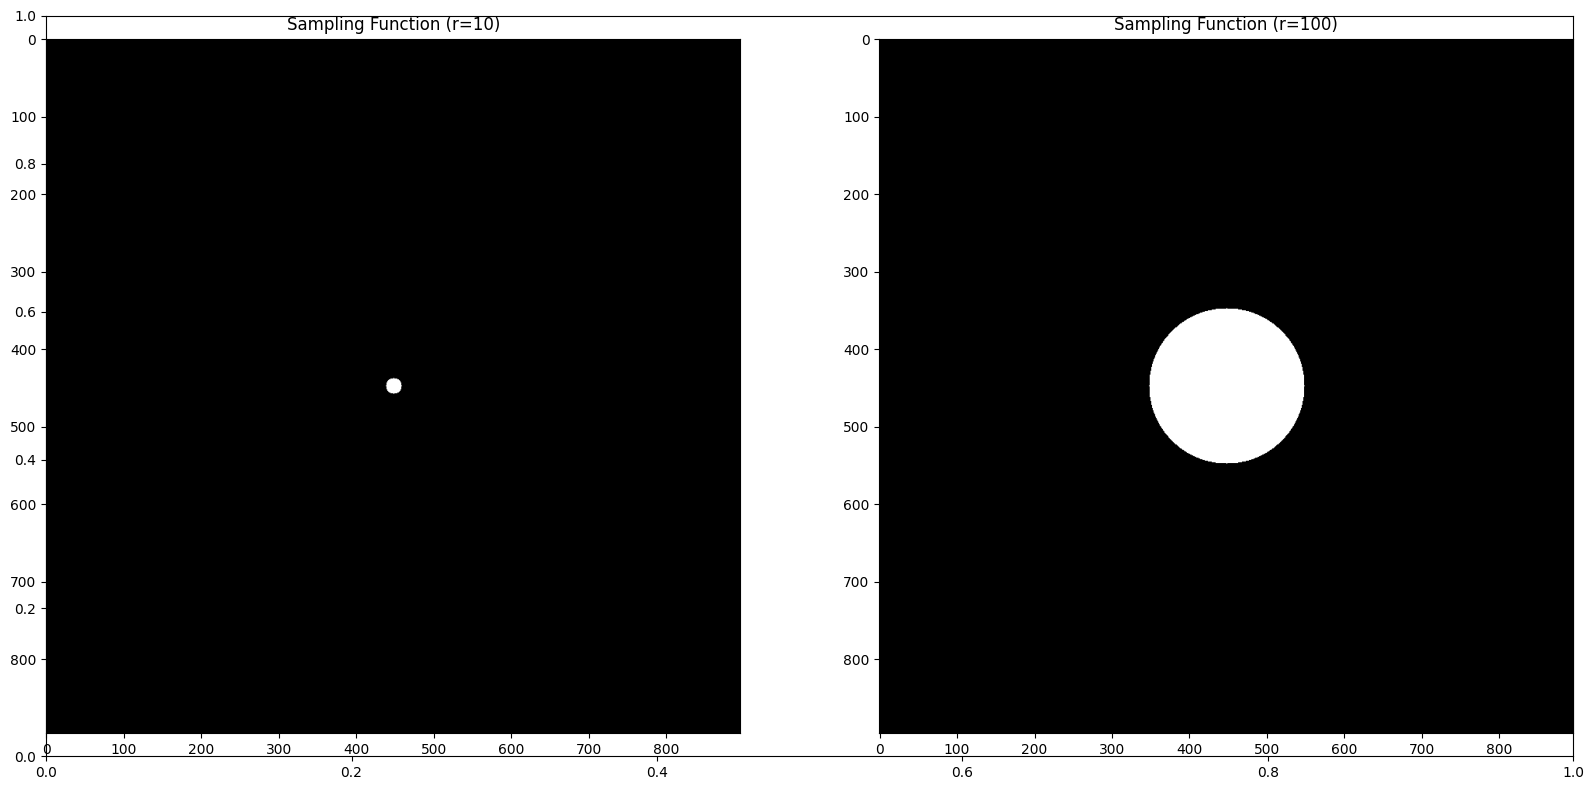

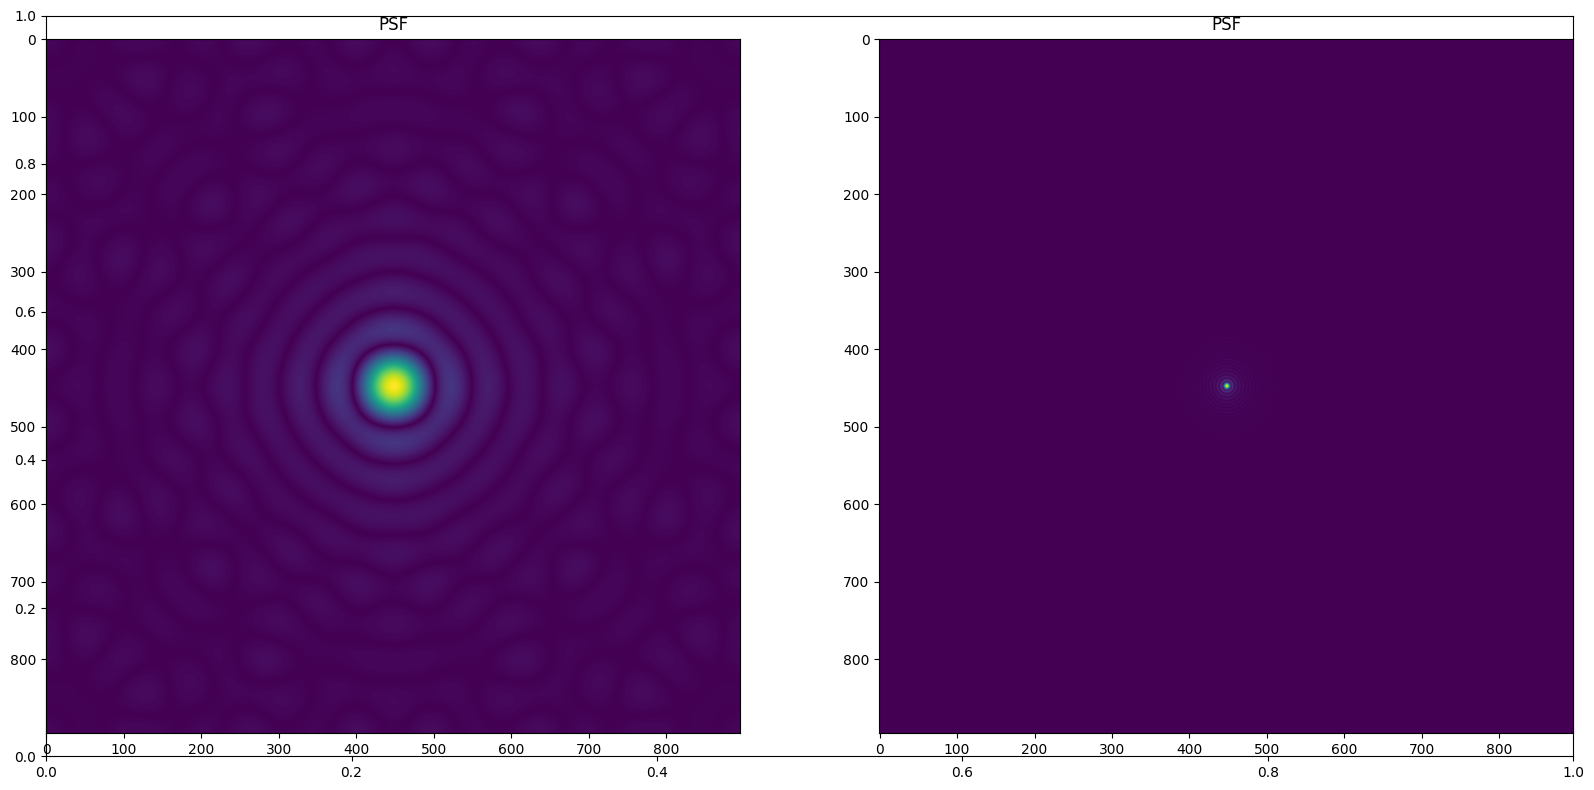

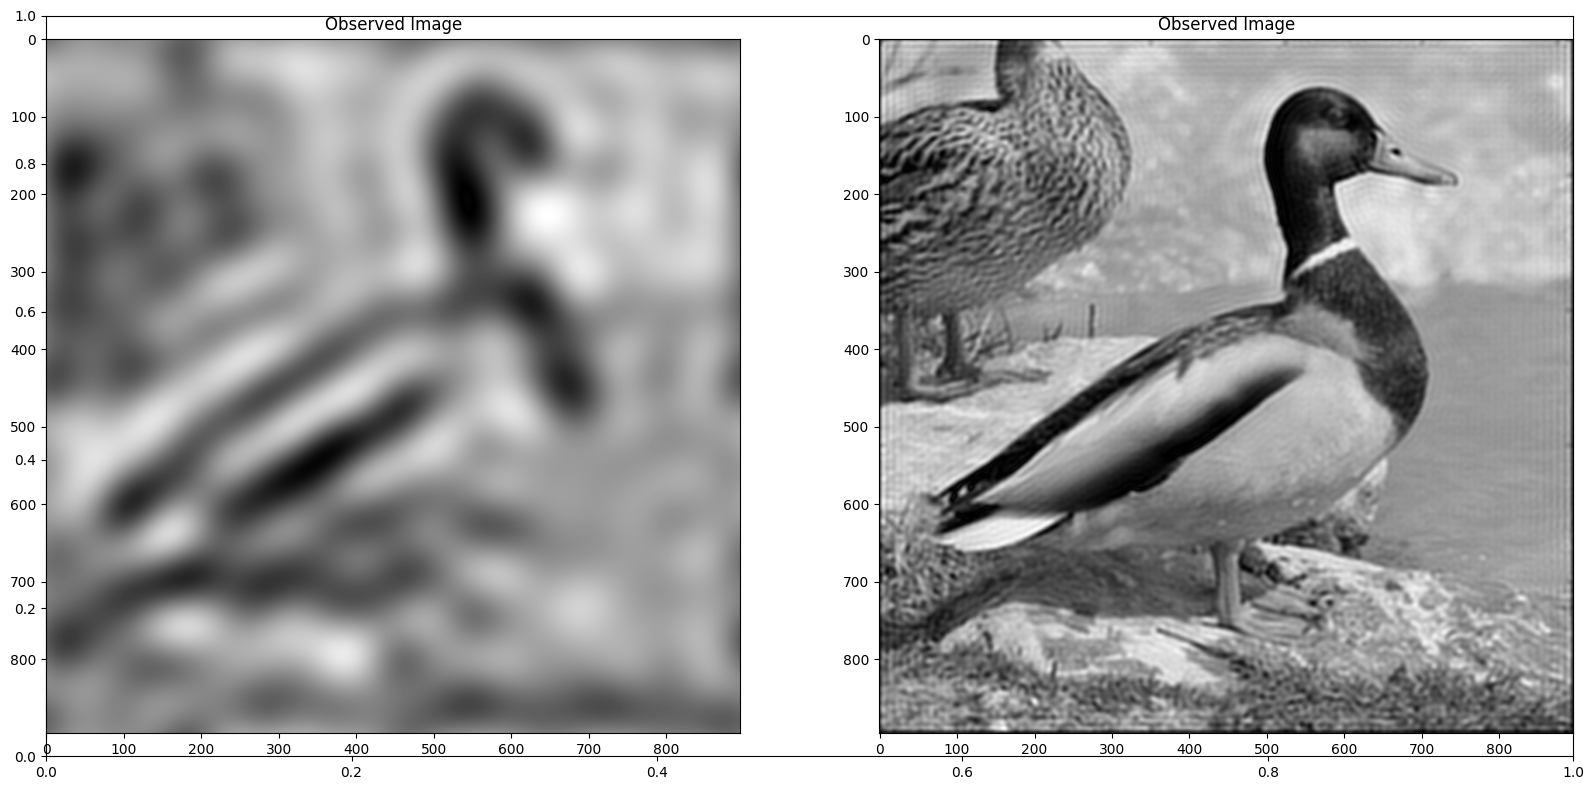

In [100]:
fig, axes = plt.subplots(figsize=(16,8))
fig.tight_layout()

plt.subplot(1,2,1)
sampling0 = circularSamplingMap(896, 10, 0)
samplingPlot = plt.imshow(sampling0)
samplingPlot.set_cmap('gray')
plt.title('Sampling Function (r=%i)'%10)

plt.subplot(1,2,2)
sampling1 = circularSamplingMap(896, 100, 0)
samplingPlot = plt.imshow(sampling1)
samplingPlot.set_cmap('gray')
plt.title('Sampling Function (r=%i)'%100)

fig, axes = plt.subplots(figsize=(16,8))
fig.tight_layout()

plt.subplot(1,2,1)
psfPlot = plt.imshow(np.abs( np.fft.fftshift( np.fft.fft2(sampling0))))
plt.title('PSF')

plt.subplot(1,2,2)
psfPlot = plt.imshow(np.abs( np.fft.fftshift( np.fft.fft2(sampling1))))
plt.title('PSF')

fig, axes = plt.subplots(figsize=(16,8))
fig.tight_layout()

plt.subplot(1,2,1)
obsDuck = np.abs(np.fft.ifft2(np.fft.fftshift(sampling0 * fftDuck)))
obsPlot = plt.imshow(obsDuck)
obsPlot.set_cmap('gray')
plt.title('Observed Image')

plt.subplot(1,2,2)
obsDuck = np.abs(np.fft.ifft2(np.fft.fftshift(sampling1 * fftDuck)))
obsPlot = plt.imshow(obsDuck)
obsPlot.set_cmap('gray')
plt.title('Observed Image')